# Data Exploration

Before building the machine learning models, we conducted an initial exploratory analysis to gain a deeper understanding of our dataset. This analysis also helped us in deciding on the model features later on.

## Setup

For our initial exploratory analysis, we used pyplot from matplotlib, seaborn and wordcloud to visualize the dataset.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [2]:
# Read clickbait dataset as pandas DataFrame
clickbait_data = pd.read_csv("data/clickbait_data.csv")

# Dataset exploration
print(clickbait_data.head(), "\n")
print(clickbait_data.tail(), "\n")
print(clickbait_data.info(), "\n")
print(clickbait_data.describe(), "\n")
print(
    "Number of non-clickbait headlines:",
    len(clickbait_data[clickbait_data["clickbait"] == 0])
)
print(
    "Number of clickbait headlines:",
    len(clickbait_data[clickbait_data["clickbait"] == 1])
)

                                            headline  clickbait
0                                 Should I Get Bings          1
1      Which TV Female Friend Group Do You Belong In          1
2  The New "Star Wars: The Force Awakens" Trailer...          1
3  This Vine Of New York On "Celebrity Big Brothe...          1
4  A Couple Did A Stunning Photo Shoot With Their...          1 

                                                headline  clickbait
31995  To Make Female Hearts Flutter in Iraq, Throw a...          0
31996  British Liberal Democrat Patsy Calton, 56, die...          0
31997  Drone smartphone app to help heart attack vict...          0
31998  Netanyahu Urges Pope Benedict, in Israel, to D...          0
31999  Computer Makers Prepare to Stake Bigger Claim ...          0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headline   32

The DataFrame consists of two columns ('headline' and 'clickbait') which contain the headlines and a dummy variable ($1$ = *True*, $2$ = *False*) indicating whether a headline contains clickbait language or not. About half of the headlines are classified as clickbait.

## Most Frequent Words in Headlines

To scan the headlines for common word patterns, we visualized the most frequent words for both non-clickbait and clickbait headlines using wordclouds.

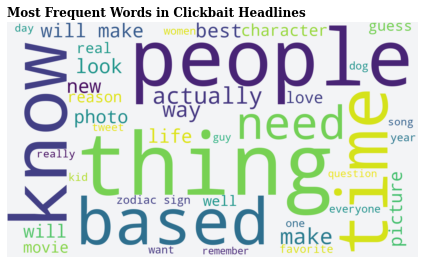

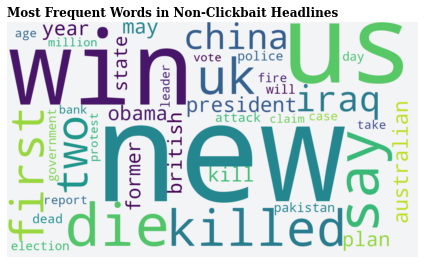

In [3]:
# Join all (non-) clickbait headlines and convert resulting string to
# lower case
headlines_clickbait = " ".join(
    clickbait_data[clickbait_data["clickbait"] == 1]["headline"]
).lower()

headlines_non_clickbait = " ".join(
    clickbait_data[clickbait_data["clickbait"] == 0]["headline"]
).lower()

# Clean up headline strings by including only words with more than one
# alpha-numeric characters
headlines_clickbait = " ".join(
    [word for word in headlines_clickbait.split() if len(word) > 1 and word.isalnum()]
)

headlines_non_clickbait = " ".join(
    [word for word in headlines_non_clickbait.split() if len(word) > 1 and word.isalnum()]
)

# Generate word clouds
wordcloud_clickbait = WordCloud(
    width=1400, height=800, max_words=40, background_color="#F3F4F6"
).generate(headlines_clickbait)

wordcloud_non_clickbait = WordCloud(
    width=1400, height=800, max_words=40, background_color="#F3F4F6"
).generate(headlines_non_clickbait)

# Plot word clouds and save figures as .png files
plt.figure(facecolor = "white")
plt.imshow(wordcloud_clickbait, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 1.08)
plt.title(
    "Most Frequent Words in Clickbait Headlines",
    fontweight="bold",
    fontname="serif",
    loc = "left"
)

plt.savefig("figures/most_frequent_clickbait_words.png", dpi=300)
plt.show()

plt.figure(facecolor = "white")
plt.imshow(wordcloud_non_clickbait, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 1.08)
plt.title(
    "Most Frequent Words in Non-Clickbait Headlines",
    fontweight="bold",
    fontname="serif",
    loc = "left"
)

plt.savefig("figures/most_frequent_non_clickbait_words.png", dpi=300)
plt.show()

The two headline groups clearly compose of different types of words.

## Number of Words in Headline

Furthermore, we analyzed the average number of words per headline for clickbait and non-clickbait headlines.

,headline,clickbait,word_count
0,Should I Get Bings,1,4
1,Which TV Female Friend Group Do You Belong In,1,9
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1,14
3,"This Vine Of New York On ""Celebrity Big Brothe...",1,12
4,A Couple Did A Stunning Photo Shoot With Their...,1,18


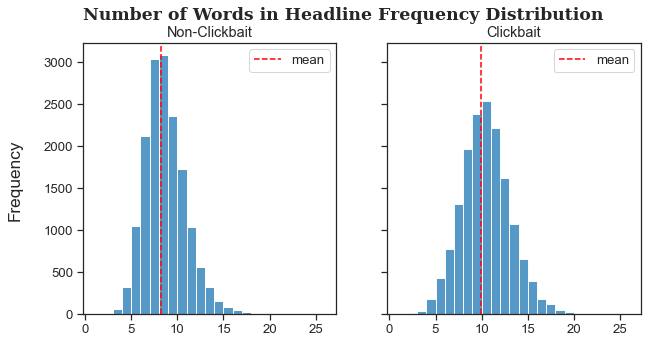

In [4]:
# Create a new column 'word_count' containing the number of words in
# each headline
clickbait_data["word_count"] = (
    clickbait_data["headline"].str.split().apply(len)
)

# use display to print nicely
display(clickbait_data.head())

# Visualize the word counts as histograms via Seaborn

# Set global styles
sns.set_context("notebook", font_scale = 1.2)
sns.set_style("ticks")

# Plot 2 histograms on the same figure with 1 row and 2 columns
fig, axes = plt.subplots(nrows = 1, ncols = 2, sharex = True, sharey = True, figsize = (10, 5))

sns.histplot(
    data = clickbait_data[clickbait_data["clickbait"] == 0],
    x = "word_count",
    binwidth = 1,
    ax = axes[0]
)

# Add vertical line to indicate the mean
axes[0].axvline(
    clickbait_data[clickbait_data["clickbait"] == 0]["word_count"].mean(),
    color = "r",
    linestyle = "--",
    label = "mean"
)

sns.histplot(
    data = clickbait_data[clickbait_data["clickbait"] == 1],
    x = "word_count",
    binwidth = 1,
    ax = axes[1]
)
axes[1].axvline(
    clickbait_data[clickbait_data["clickbait"] == 1]["word_count"].mean(),
    color = "r",
    linestyle = "--",
    label = "mean"
)

fig.suptitle(
    "Number of Words in Headline Frequency Distribution",
    fontweight = "bold",
    fontname = "serif",
    horizontalalignment='left',
    x = fig.subplotpars.left
)
fig.supylabel("Frequency")
axes[0].set_title("Non-Clickbait")
axes[1].set_title("Clickbait")
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[0].set_ylabel(None)
axes[1].set_ylabel(None)
axes[0].legend()
axes[1].legend()

# Save figure as .png file
plt.savefig("figures/word_number_distributions.png", dpi=300)
plt.show()

On average, clickbait headlines tend to be longer compared to non-clickbait ones.

## Frequency of Word Types

We hypothesized that clickbait headlines contain different kinds of words compared to non-clickbait headlines. To analyze this, we looked at [auxiliary verbs](https://en.wikipedia.org/wiki/Auxiliary_verb) (e.g. *could*, *must*, *should*), [interrogative pro-forms](https://en.wiktionary.org/wiki/Category:English_interrogative_pro-forms)—question words—(e.g. *who*, *which*, *what*) and [personal pronouns](https://en.wikipedia.org/wiki/English_personal_pronouns) (e.g. her, you).

In [5]:
# Source: https://en.wikipedia.org/wiki/Auxiliary_verb
AUXILIARY_VERBS = set(
    [
        "be",
        "can",
        "could",
        "dare",
        "do",
        "have",
        "may",
        "might",
        "must",
        "need",
        "ought",
        "shall",
        "should",
        "will",
        "would",
    ]
)

# Source: https://en.wiktionary.org/wiki/Category:English_interrogative_pro-forms
INTERROGATIVE_PRO_FORMS = set(
    [
        "how",
        "how come",
        "how far",
        "how long",
        "how many",
        "how much",
        "in what world",
        "since when",
        "the hell",
        "to what end",
        "what",
        "what about",
        "what for",
        "what kind of",
        "what the heck",
        "what the hell",
        "whatever",
        "whatsoever",
        "when",
        "whence",
        "where",
        "whereto",
        "wherever",
        "whether",
        "which",
        "which one",
        "whichever",
        "whichsoe'er",
        "whichsoever",
        "whither",
        "who",
        "whoever",
        "whom",
        "whomever",
        "whomsoever",
        "whose",
        "whoso",
        "whosoe'er",
        "whosoever",
        "why",
    ]
)

# Source: https://en.wikipedia.org/wiki/English_personal_pronouns
PERSONAL_PRONOUNS = set(
    [
        "he",
        "her",
        "hers",
        "herself",
        "him",
        "himselfshe",
        "his",
        "i",
        "it",
        "its",
        "itself",
        "me",
        "mine",
        "my",
        "myself",
        "one",
        "one's",
        "oneself",
        "our",
        "ours",
        "ourself",
        "ourselves",
        "thee",
        "their",
        "theirs",
        "them",
        "themself",
        "themselves",
        "they",
        "thine",
        "thou",
        "thy",
        "thyself",
        "us",
        "we",
        "y'all",
        "y'all's",
        "y'all's selves",
        "y'alls",
        "y'alls selves",
        "ye",
        "yeer",
        "yeers",
        "yeerselves",
        "you",
        "you all",
        "your",
        "yours",
        "yourself",
        "yourselves",
        "youse",
    ]
)

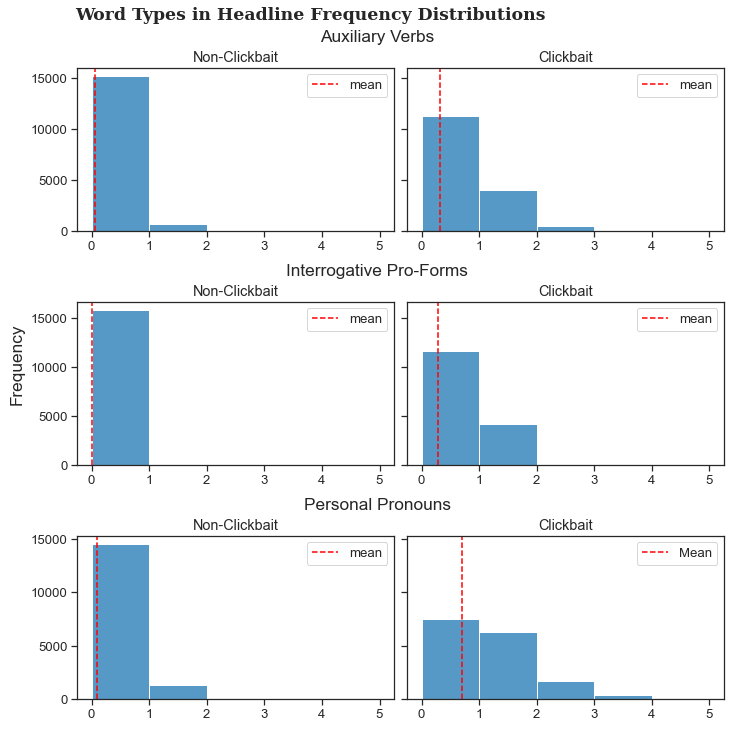

In [6]:
# Create new columns containing the word type counts
clickbait_data["auxiliary_verb_count"] = (
    clickbait_data["headline"]
    .str.lower()
    .str.split()
    .apply(lambda array: sum(1 if word in AUXILIARY_VERBS else 0 for word in array))
)

clickbait_data["interrogative_pro_form_count"] = (
    clickbait_data["headline"]
    .str.lower()
    .str.split()
    .apply(lambda array: sum(1 if word in INTERROGATIVE_PRO_FORMS else 0 for word in array))
)

clickbait_data["personal_pronouns"] = (
    clickbait_data["headline"]
    .str.lower()
    .str.split()
    .apply(lambda array: sum(1 if word in PERSONAL_PRONOUNS else 0 for word in array))
)

# Visualize the word counts of the different word types in headlines as
# barplots via Seaborn

# Set global styles
sns.set_context("notebook", font_scale = 1.2)
sns.set_style("ticks")

# Plot 6 bar charts on the same figure with 3 rows and 2 columns
fig = plt.figure(
    constrained_layout = True,
    figsize = (10, 10),
)
subfigs = fig.subfigures(3, 1)
ax0 = subfigs[0].subplots(
    nrows = 1, ncols = 2, sharex = True, sharey = True)
ax1 = subfigs[1].subplots(
    nrows = 1, ncols = 2, sharex = True, sharey = True)
ax2 = subfigs[2].subplots(
    nrows = 1, ncols = 2, sharex = True, sharey = True)

sns.histplot(
    data = clickbait_data[clickbait_data["clickbait"] == 0],
    x = "auxiliary_verb_count",
    binwidth = 1,
    ax = ax0[0],
)
ax0[0].axvline(
    clickbait_data[clickbait_data["clickbait"] == 0][
        "auxiliary_verb_count"
    ].mean(),
    color = "r",
    linestyle = "--",
    label = "mean",
)
sns.histplot(
    data=clickbait_data[clickbait_data["clickbait"] == 1],
    x = "auxiliary_verb_count",
    binwidth = 1,
    ax = ax0[1],
)
ax0[1].axvline(
    clickbait_data[clickbait_data["clickbait"] == 1][
        "auxiliary_verb_count"
    ].mean(),
    color = "r",
    linestyle = "--",
    label = "mean",
)
sns.histplot(
    data=clickbait_data[clickbait_data["clickbait"] == 0],
    x = "interrogative_pro_form_count",
    binwidth = 1,
    ax = ax1[0],
)
ax1[0].axvline(
    clickbait_data[clickbait_data["clickbait"] == 0][
        "interrogative_pro_form_count"
    ].mean(),
    color = "r",
    linestyle = "--",
    label = "mean",
)
sns.histplot(
    data = clickbait_data[clickbait_data["clickbait"] == 1],
    x = "interrogative_pro_form_count",
    binwidth = 1,
    ax = ax1[1],
)
ax1[1].axvline(
    clickbait_data[clickbait_data["clickbait"] == 1][
        "interrogative_pro_form_count"
    ].mean(),
    color = "r",
    linestyle = "--",
    label = "mean",
)
sns.histplot(
    data=clickbait_data[clickbait_data["clickbait"] == 0],
    x = "personal_pronouns",
    binwidth = 1,
    ax = ax2[0],
)
ax2[0].axvline(
    clickbait_data[clickbait_data["clickbait"] == 0][
        "personal_pronouns"
    ].mean(),
    color = "r",
    linestyle = "--",
    label = "mean",
)
sns.histplot(
    data = clickbait_data[clickbait_data["clickbait"] == 1],
    x = "personal_pronouns",
    binwidth = 1,
    ax = ax2[1],
)
ax2[1].axvline(
    clickbait_data[clickbait_data["clickbait"] == 1][
        "personal_pronouns"
    ].mean(),
    color = "r",
    linestyle = "--",
    label = "Mean",
)

fig.suptitle(
    "Word Types in Headline Frequency Distributions",
    fontweight = "bold",
    fontname = "serif",
    horizontalalignment='left',
    x = fig.subplotpars.left - 0.03
)
fig.supylabel("Frequency")
subfigs[0].suptitle("Auxiliary Verbs")
subfigs[1].suptitle("Interrogative Pro-Forms")
subfigs[2].suptitle("Personal Pronouns")
ax0[0].set_xlabel(None)
ax0[1].set_xlabel(None)
ax1[0].set_xlabel(None)
ax1[1].set_xlabel(None)
ax2[0].set_xlabel(None)
ax2[1].set_xlabel(None)
ax0[0].set_ylabel(None)
ax0[1].set_ylabel(None)
ax1[0].set_ylabel(None)
ax1[1].set_ylabel(None)
ax2[0].set_ylabel(None)
ax2[1].set_ylabel(None)
ax0[0].set_title("Non-Clickbait")
ax0[1].set_title("Clickbait")
ax1[0].set_title("Non-Clickbait")
ax1[1].set_title("Clickbait")
ax2[0].set_title("Non-Clickbait")
ax2[1].set_title("Clickbait")
ax0[0].set_xlim(-0.25, 5.25)
ax0[1].set_xlim(-0.25, 5.25)
ax1[0].set_xlim(-0.25, 5.25)
ax1[1].set_xlim(-0.25, 5.25)
ax2[0].set_xlim(-0.25, 5.25)
ax2[1].set_xlim(-0.25, 5.25)
ax0[0].legend()
ax0[1].legend()
ax1[0].legend()
ax1[1].legend()
ax2[0].legend()
ax2[1].legend()

# Save figure as .png file
plt.savefig("figures/word_type_distributions.png", dpi=300)
plt.show()

Clickbait headlines seems to include more auxiliary verbs, interrogative pro-forms, and personal pronouns compared to headlines without clickbait.